In [4]:
from fitparse import FitFile
import pandas as pd
import os
import datetime

In [6]:
def rec_to_excel(filename):
    fitfile = FitFile("./garmin_records_may/"+filename)
    records = []
    for record in fitfile.get_messages('record'):
        # Go through all the data entries in this record
        record_dict = {}
        start_time = ""
        for record_data in record:
            if record_data.name == "timestamp":
                #record_time = datetime.datetime.strptime(record_data.value, "%Y-%m-%d %H:%M:%S")
                record_time = record_data.value
                record_time += datetime.timedelta(hours=8)
                record_dict["localtime"] = record_time
                if start_time == "":
                    start_time = record_time.strftime("%Y-%m-%d")
                    start_time_hour = record_time.hour
            else:
                record_dict[record_data.name] = record_data.value
        records.append(record_dict)
        #print("")
    df = pd.DataFrame(records)
    if "{}.xlsx".format(record_time.strftime("%Y-%m-%d")) in os.listdir("./record_excels_may/"):
        filename = "{}.xlsx".format(record_time.strftime("%Y-%m-%d"))
        df_old = pd.read_excel("./record_excels_may/{}".format(filename))
        if df["localtime"][0] < df_old["localtime"][0]:
            df.to_excel("./record_excels_may/{}.xlsx".format(start_time))
    else:
        df.to_excel("./record_excels_may/{}.xlsx".format(record_time.strftime("%Y-%m-%d")))

In [7]:
for filename in os.listdir("./garmin_records_may/"):
    rec_to_excel(filename)

In [6]:
df = pd.DataFrame(records)

In [25]:
def trans_speed(speed_df):
    output = []
    for speed in speed_df:
        if speed == 0:
            output.append(15)
            continue
        mk = 1000/speed/60
        if mk > 15:
            output.append(output[-1])
        else:
            output.append(mk)
    return output

In [28]:
#df["min/km"] = trans_speed(df["speed"])
df["min/km"] = 1000/df["speed"]/60

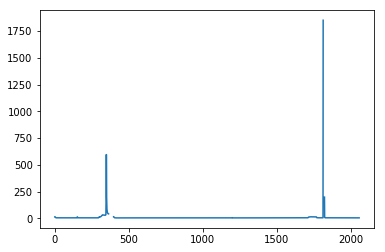

In [29]:
%matplotlib inline
df["min/km"].plot()

In [30]:
df

,altitude,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_88,min/km
0,-1.2,59,0.00,-1.2,1.232,0.5,81,299229571,1449756565,1.232,2018-11-05 22:36:41,300,13.528139
1,-1.2,59,1.08,-1.2,1.297,0.5,81,299229479,1449756485,1.297,2018-11-05 22:36:42,300,12.850167
2,-1.2,59,4.65,-1.2,1.241,0.5,81,299229156,1449756254,1.241,2018-11-05 22:36:43,300,13.430030
3,-1.2,59,4.65,-1.2,1.241,0.5,81,299229156,1449756254,1.241,2018-11-05 22:36:44,300,13.430030
4,-1.4,59,7.36,-1.4,1.409,0.5,82,299228920,1449756065,1.409,2018-11-05 22:36:45,300,11.828720
5,-1.4,59,10.34,-1.4,1.913,0.5,82,299228678,1449755832,1.913,2018-11-05 22:36:46,300,8.712319
6,-1.2,59,13.20,-1.2,2.426,0.5,82,299228448,1449755608,2.426,2018-11-05 22:36:47,300,6.870019
7,-1.4,79,16.11,-1.4,2.725,0.5,82,299228214,1449755378,2.725,2018-11-05 22:36:48,300,6.116208
8,-1.4,83,19.46,-1.4,2.734,0.0,82,299227972,1449755085,2.734,2018-11-05 22:36:49,300,6.096074
9,-1.4,83,22.58,-1.4,3.182,0.0,82,299227732,1449754827,3.182,2018-11-05 22:36:50,300,5.237796
